<h1>Project DSCI 100-group-17</h1>
 Minecraft Data Analysis

## Introduction
A research group at ubc is conducting a research on how people play video games. They are provididng free servers to players for this project and record their actions in minecraft world. Allocating servers for players to play minecraft is hard: they must focus their recruitment efforts and ensure that they have sufficient resources (such as server hardware and software licensing) to manage the volume of players they draw in. 

The Computer Science department at UBC has given us 2 files containing data on the players who use their server to play Minecraft.

### Question we are answering

- Below is the question given by UBC research group that we are trying to answer
- Question 1: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Following 2 files are provided to us** 

The first file is **players.csv** containg info on each player.
The columns in this dataset are:

- `experience <fct>` - It's a categorical column indicating the level of player
- `subscribe <lgl>` - Whether user subscribed for promotion emails (`true`) or not (`false`) 
- `hashedEmail <chr>` - A unique Id for each player
- `played_hours <dbl>` - tells how many hours the player has played the game
- `name <chr>` - Game name choosen by each player
- `gender <fct>` - gender of the player
- `age <int>` - age of the player
- `individualId` - ***empty column***
- `organizationName` - ***empty column***

The second file is **sessionss.csv** containg info on each session on the server.
The columns in the **sessions.csv** dataset are:

- `hashedEmail <chr>` - A unique Id for each player
- `start_time <dttm>` - The time when each session has started with date and time
- `end_time <dttm>` - The time when each session has ended with date and time
- `original_start_time <dbl>` - Unix time for the start of the session
- `original_end_time <dbl>` - Unix time for the end of the session

The **Players dataset** have 196 observations, **Sessions Dataset** have 1535 observations


**Datasets we are using**

We are using both data sets to make a regression model to predict played_hours. 

The explanotary variables we will be using are :

- `age <int>` - age of the player

 **We will be converting experience into numerical value to make it work as an exploratory variable**
 
- `experience <dbl>` - It will be a quantitative variable describing the experience of a player

 **We will be using sessions.csv file to get the number of sessions each user played and then we will merge both datasets and will get rid of unwanted variable**
 
- `number_of_sessions <int>` - This variable will tell us how many sessions each player logged in.

## Methods and Results

### Methods

**Loading**

We were given two different URL google drive links which contained two separate dataset files. We copied the url and saved it and used read_csv on these urls to read the data into jupyter and saved them as players_data and session_data respectively. Then we converted both these datasets into a dataframe in order to wrangle them.

**Wrangling**

To prepare the data, we merged both datasets using the common column “hashedEmail” by implementing the left_join function. We also removed columns such as individualID, organizationName, original_start_time, original_end_time, start_time and end_time, in order to create a clear and concise dataframe with variables of use towards answering our question. The reason we merged both data frames in the first place was to ultimately add a new column called “number_of_sessions”, to count the sessions played by each player as found by implementing the left_join function again using the common column name. Here, either name or hashedEmail could be used in the left_join function as both variables were confirmed to be unique for each player. The “experience_level” column was transformed into an ordinal numeric variable, with levels coded from 1 (Beginner) to 5 (Veteran), to use in regression analysis. Redundant columns such as hashedEmail and the original experience column were removed to streamline the dataset for analysis. The hashedEmail was chosen to be removed over the name column, which also is a unique identifier, because it made the table less chaotic, as names are easier to read than hashedEmails.

**Visualization**

We created three visualisations to explore the dataset and its variables. A bar plot was used to show average played hours by experience level, highlighting differences in playtime across categories. We used a scatter plot of played hours by age to reveal trends between age and playtime. Another scatter plot, played hours by the number of sessions, helped examine the correlation between session count and playtime. These visualisations provided a foundation for understanding the data and refining our predictive modelling approach.

**Modeling**

Before modelling, we first filtered our data to remove observations for ages under 5 and ages over 80. This was done because there is a high likelihood that people above 80 and below 5 are not playing this game as these ages are indicative of some foul play by the users themselves, feeding false information into the system. We then distributed the merged_final dataset into 75% training and 25% testing data for our 3 different models and set the strata equal to the variable which we are using as our predictor. We used 5 cross validation folds in our tuning to get the mean value of all the different RMSEs we get on training data for the same value of k. We also set a seed for each model so we can reproduce the same results as the randomness in how data is split along with the randomness involved in cross validation folds, can affect the performance metrics of our model which would lead to different optimal values of K. We tuned 2 k-nearest neighbours regression models to find the best k for these models in order to predict played_hours using age and experience. We created a linear regression model for predicting played_hours based on number_of_sessions because the visualization tells us that there is a positive relation between the number of sessions and played hours. We collected RMSE data for all the models and then pulled the best k value for K-nearest neighbours regression models. Then we developed k-nearest neighbours models using best k obtained by collecting metrics and getting the value of k for the lowest mean. To determine the best k we get the observation with the lowest RMSE, the lowest RMSE means that this k will have the lowest prediction error based on our training data. Then our models were tested using the testing data and metrics were then pulled to get RMSPE. RMSPE tells us the prediction error on the testing data.
  
**Visualizing Analysis**
  
For visualizing analysis, we created plots of training data with a blue line showcasing the predicted values on the training data using the models we created previously. The blue line for the Played hours Vs Predicted Played hours for the predictor experience was very low on the bar chart, with a slight curve and levelled off, which represented the poor quality of the predictor model. For the age predictor, the blue line wasn’t much better as it was also low but it increased around the age of 20 and then decreased and leveled off as the age progressed to 40. Then for the number of sessions predictor, the blue line was a straight linear line going through a few points in the beginning, indicating that there may be a positive correlation between the number of sessions and total played hours.


## Discussion

### What did we find ?

None of our predictor models did a good job, as our following best fit models, hours_age_best_fit, hours_experience_best_fit and hours_sessions_best_fit, all had high RMSE and RMSPEs, therefore the errors we are getting while predicting values are ridiculously high. The respective RMSEs which we got from predicting our training data are 30.5 for hours_age_best_fit and 29.8 for hours_experience_best_fit. This means that our predictor value could be off by or up to 30.5 hours which means that age is not a very predictor for our model, as well as experience because the predictor value we got was 29.8 hours which means it was not a very good predictor for our model. When we applied our predictor to our testing data, we got the RMSPEs to be 41.9 hours for hours_age_best_fit, 39.7 hours for hours_experience_best_fit and 22.7 hours for hours_sessions_best_fit. Again all these values are too high which means that our models are incapable of predicting played_hours under any acceptable RMSE and RMSPEs therefore these models are of no use. 

### Is this what we expected ?

We originally expected not to find any conclusive evidence for our three predictors, experience, age or sessions to help predict how many hours can be played by a player. This is because we figured that having such little data that varies a lot in the different values of each predictor cannot possibly predict the total played hours based on these three predictors accurately and consistently. Thinking logically, we assumed that players that are more experienced would play on the server for a longer time, but contrary to this idea, someone who is new should also theoretically play more as they are just beginning to learn about the game and might want to get better at it. For the age predictor, we expected younger players to play more than older players as younger players are traditionally more in tune with videogames and have much more free time than adults. Then we also expected that players that logged on to the server would play for a longer total time. However, as we began tidying the data and wrangling it to fit our questions' specific needs, we noticed the lack of observations present in the datasets. The total number of players that played more than 0 hours on the server were only 111, which we concluded would not be high enough to predict which kind of players contribute to the data the most. Players can also sometimes choose random absurd values for age and their other personal information which greatly affects the model since there are so few observations. We believe there were instances of outliers in age which is the reason why we had to filter out ages over 80 and under 5. The predictor we were most hopeful for was number_of_sessions which ended up giving the lowest possible RMSPE value. We thought this because it makes sense intuitively that the more a player logs in, the higher their total played hours should be. We had little faith in the age predictor as again mentioned before, this is one variable that can easily be manipulated by the player and cannot give an honest and accurate representation of the predictor as the number of sessions did. For the experience predictor, we were hopeful that it could possibly be a good predictor but we were totally wrong as it had an RMSPE value close to the age predictor. 

### What impact our finding had


Our finding did not really have any impact as we were unable to conclusively answer our question: how do different experience levels, the ages of players and the number of sessions affect the total time played on the server?  We stated previously that more data than the current amount is needed to perform a stronger analysis in order to answer our question. Furthermore, a potential impact our finding had is possibly some mandatory verifications of players on the servers can occur in order to provide accurate data in order to make excellent models leading to accurate analyses. 

### Future Questions

Our findings do lead to future questions such as how can more data be collected, which means how can the server be scaled in order to get sufficient amounts of data in order to make models like the one we have made actually function. But general questions our group has are: What motivates players to spend more time on the server, or what makes the player wanting to come back and increase their number of sessions played on the server? Also a question about the original study design we can ask a question about is the timeframe of the data sufficient to capture long term behavior? Furthermore, how do time zone differences affect session distribution and playtime? 

### References:


**Timbers, T., Campbell, T., & Lee, M. (2022). Data science: A first introduction. Chapman & Hall/CRC.**


In [1]:
library(dplyr)
library(tidyverse)
library(tidymodels)
library(tidyr)
library(repr)
library(readr)
library(rvest)
library(ggplot2)
library(hms)
library(lubridate)
set.seed(1234)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yards

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url) #load in the two datasets

players_data_df <- as.data.frame(players_data) #convert to a dataframe in order to wrangle
# players_data_df

url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
session_data <- read_csv(url)

session_data_df <- as.data.frame(session_data) 
# session_data_df

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
#joining both datasets by hashedemail

merged_df <- left_join(players_data_df, session_data_df, by = "hashedEmail")|>
select(-individualId, -organizationName, -original_start_time, - original_end_time, -start_time, -end_time) |> 
filter(played_hours > 0)


sessions_number <- merged_df |>
group_by(name) |>
  summarise(number_of_sessions = n()) 

merged_df <- merged_df |>
  left_join(sessions_number, by = "name")

merged_df <- merged_df |>
  mutate(experience_numeric = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur" ~ 2,
    experience == "Regular" ~ 3,
    experience == "Pro" ~ 4,
    experience == "Veteran" ~ 5))

merged_exp <- merged_df |>
  distinct(name, .keep_all=TRUE)

#remove columns from dataset we dont need anymore. 
#hashed email and name are unique for each 
#indidivudal so we dont need both present, 
#and we dont need the old experience column

merged_final <- merged_exp |>
    select(-experience, -hashedEmail)

merged_final

subscribe,played_hours,name,gender,age,number_of_sessions,experience_numeric
<lgl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
TRUE,30.3,Morgan,Male,9,27,4
TRUE,3.8,Christian,Male,17,3,5
TRUE,0.7,Flora,Female,21,1,2
TRUE,0.1,Kylie,Male,21,1,3
TRUE,0.1,Natalie,Male,17,1,2
TRUE,1.6,Lane,Female,23,3,5
TRUE,1.5,Sarah,Female,25,1,1
TRUE,0.2,Thatcher,Male,22,1,2
TRUE,48.4,Xander,Female,17,37,2


## Visualization

List of 1
 $ legend.position: chr "none"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


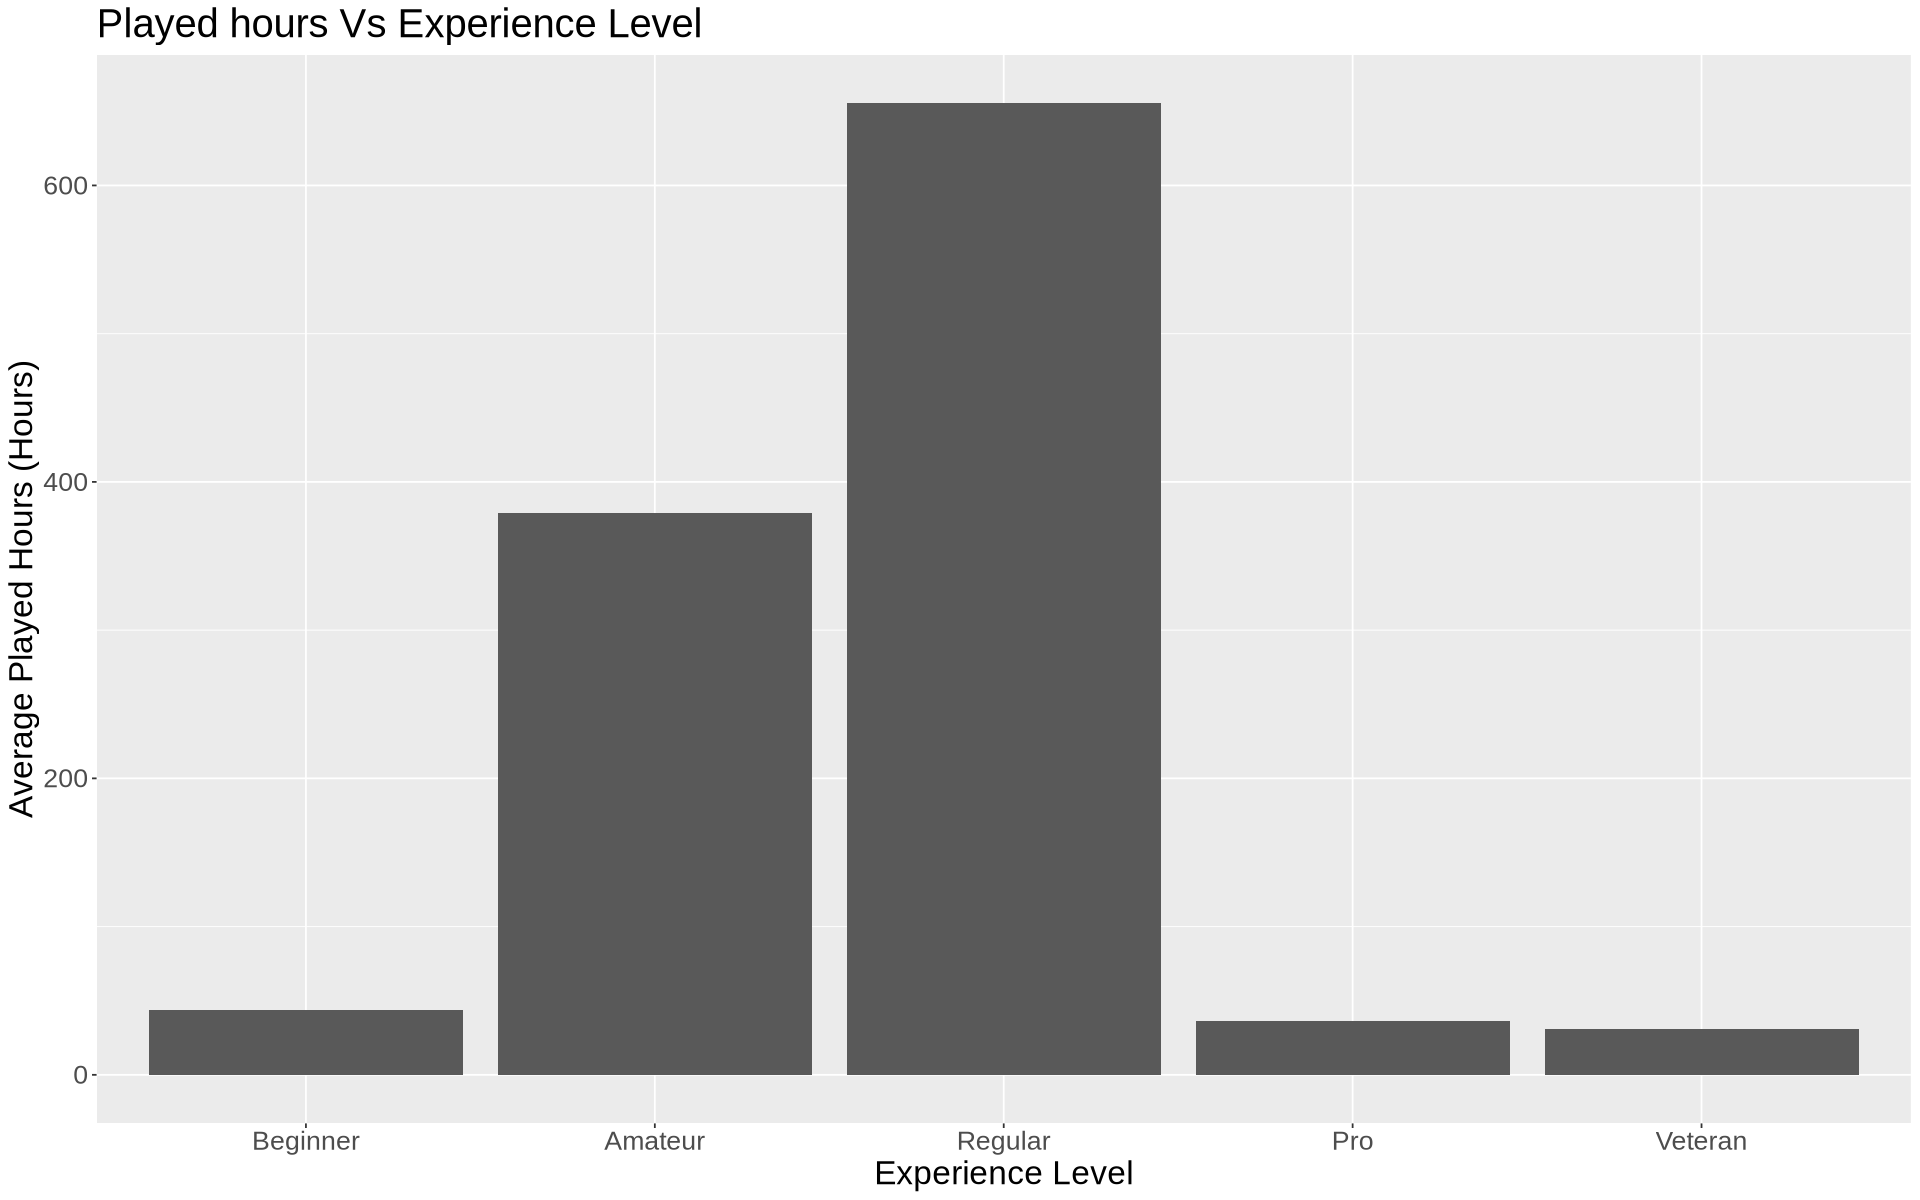

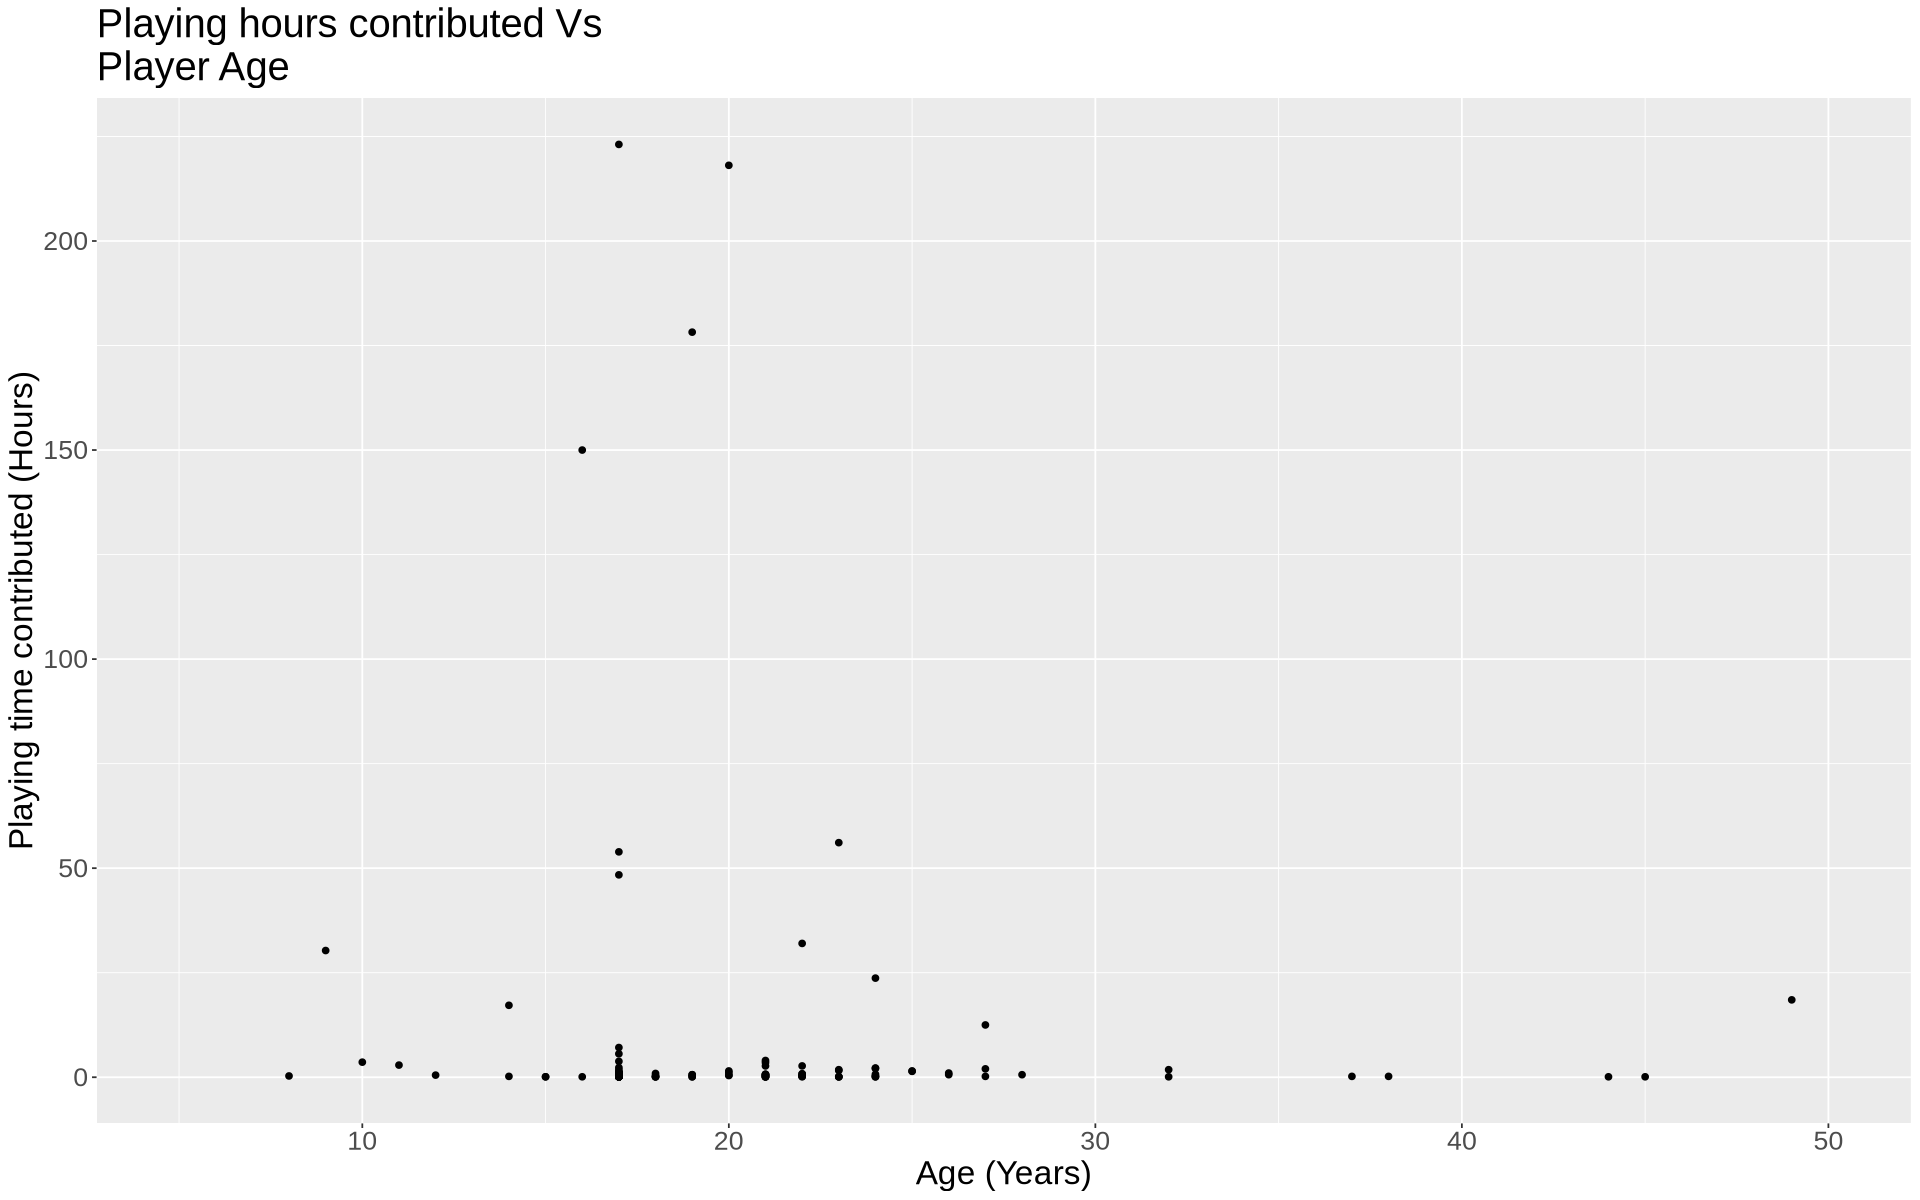

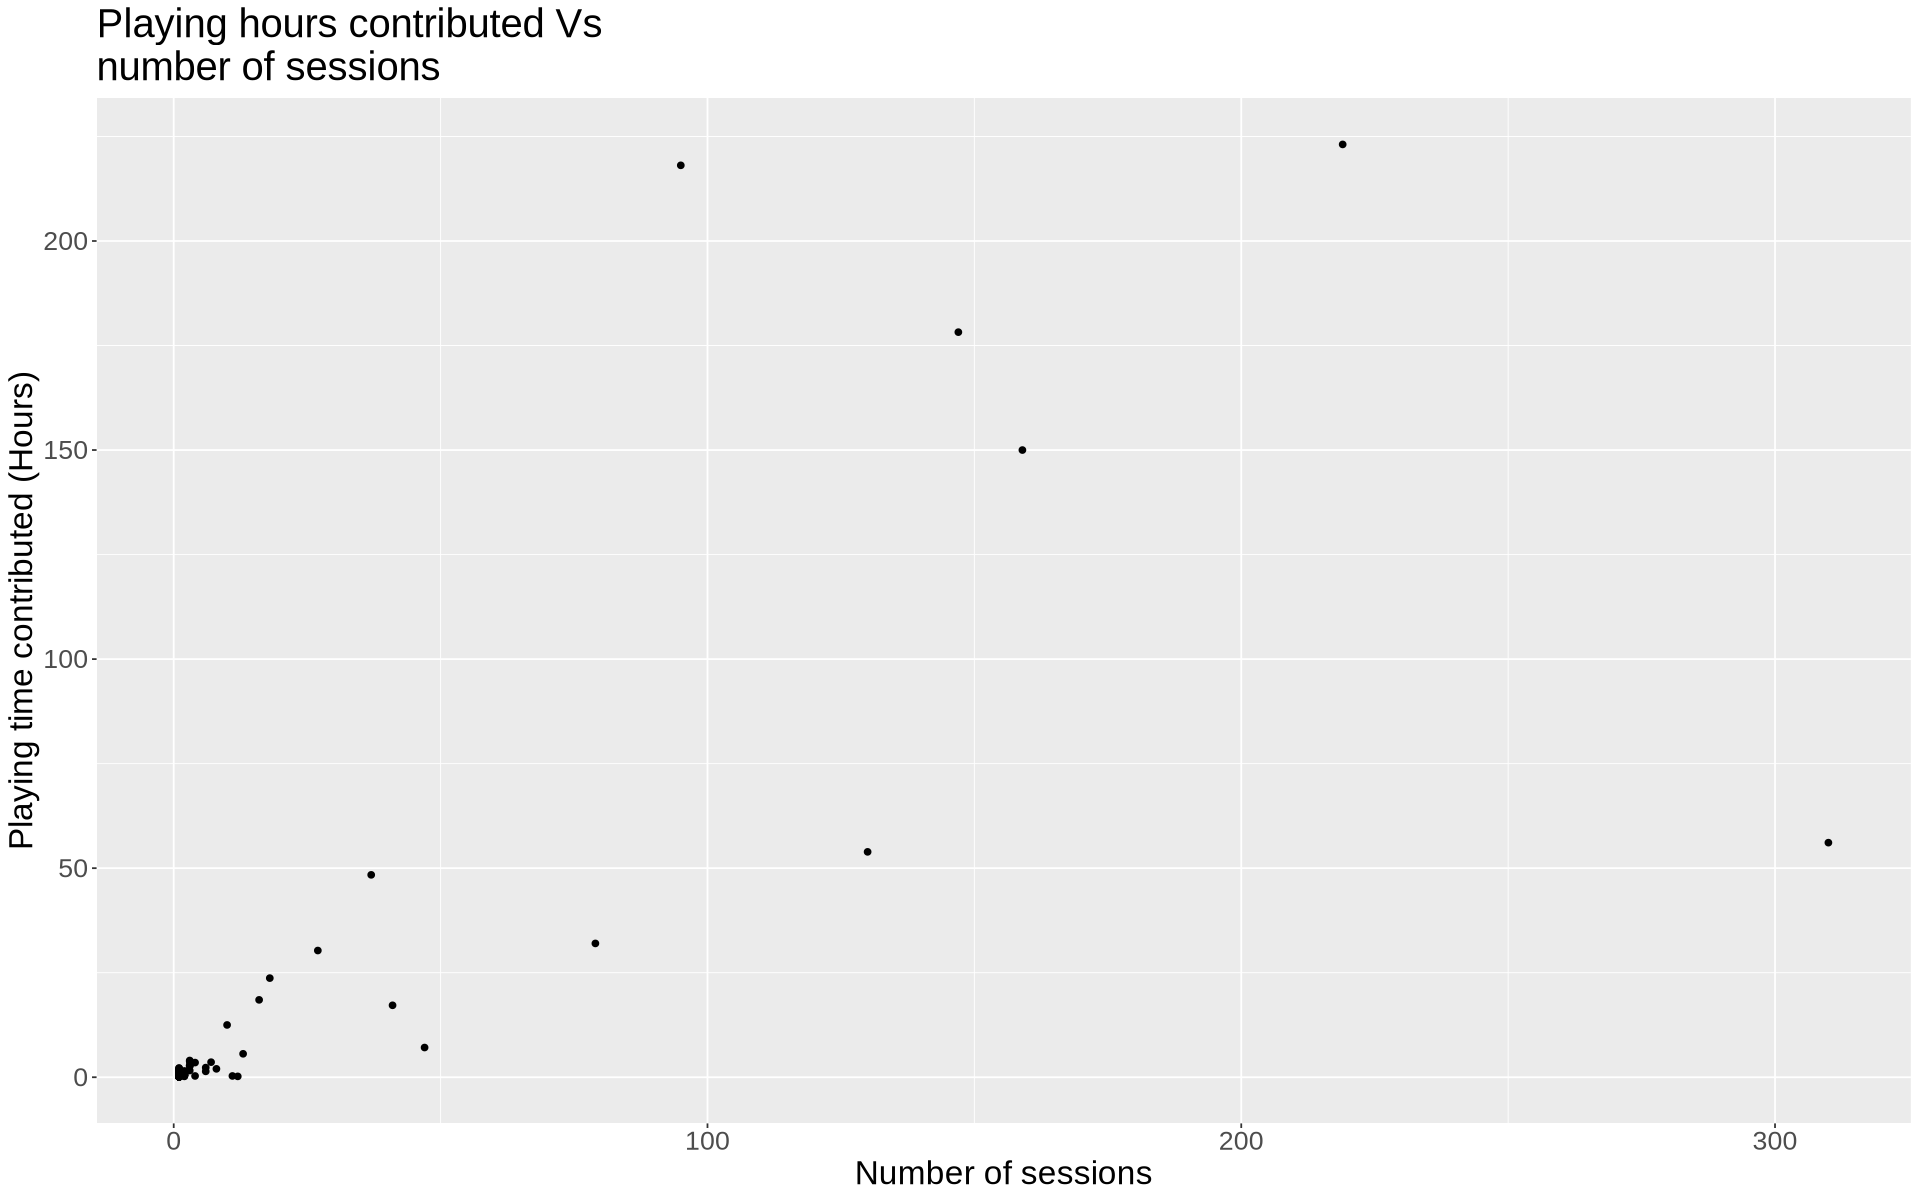

In [4]:
options(repr.plot.width = 16, repr.plot.height = 10) 

# Bar plot to visualize average played hours by experience level
ggplot(merged_final, aes(x = as.factor(experience_numeric), y = played_hours)) +
  geom_bar(stat = "identity") +
  labs(title = "Played hours Vs Experience Level",
       x = "Experience Level",
       y = "Average Played Hours (Hours)") +
      scale_x_discrete(labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")) +
    theme(text = element_text(size = 20))
    theme(legend.position = "none")

 #avg age by hours      
avg_played_hours_by_age <- merged_final |>
  group_by(age) |>
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE))

# Bar plot: Played Hours by Age
ggplot(merged_final, aes(x = age, y = played_hours)) +
  # geom_bar(stat = "identity") +
  geom_point() +
  labs(x = "Age (Years)",
    y = "Playing time contributed (Hours)",
    title = "Playing hours contributed Vs\nPlayer Age") +
    theme(text = element_text(size = 20)) +
     theme(legend.position = "none") +
    xlim(5,50)

# Bar plot: Played Hours by Sessions
ggplot(merged_final, aes(x = number_of_sessions, y = played_hours)) +
  geom_point() +
  labs(x = "Number of sessions",
    y = "Playing time contributed (Hours)",
    title = "Playing hours contributed Vs\nnumber of sessions") +
    theme(text = element_text(size = 20)) +
     theme(legend.position = "none")

options(repr.plot.width = 16, repr.plot.height = 10) 

  

In [5]:
merged_final <- ungroup(merged_final)

merged_final_no_outliers <- merged_final |>
                            filter(age < 80, age > 5)
# merged_final_no_outliers
merged_final_age_split <- initial_split(merged_final_no_outliers, prop = .75, strata = played_hours)
hours_age_training <- training(merged_final_age_split)
hours_age_testing <- testing(merged_final_age_split)



hours_experience_split <- initial_split(merged_final, prop = .75, strata = experience_numeric)
hours_experience_training <- training(hours_experience_split)
hours_experience_testing <- testing(hours_experience_split)



hours_sessions_split <- initial_split(merged_final, prop = .75, strata = number_of_sessions)
hours_sessions_training <- training(hours_sessions_split)
hours_sessions_testing <- testing(hours_sessions_split)

## Model Tuning to find best k

In [6]:


gridvals <- tibble(neighbors = seq(from = 1, to = 59, by = 1))

tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

# Tuning the model for predicting played_hours from age to find best k
hours_age_vfold <- vfold_cv(hours_age_training,v = 5, strata = played_hours)

hours_age_recipe <- recipe(played_hours ~ age, data = hours_age_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

hours_age_workflow <- workflow() |>
                    add_recipe(hours_age_recipe) |>
                    add_model(tune_spec)

hours_age_results <- hours_age_workflow |>
                    tune_grid(resamples = hours_age_vfold, grid = gridvals) |>
                    collect_metrics()

hours_age_min <- hours_age_results |>
   filter(.metric == "rmse") |>
   slice_min(mean,n= 1)

hours_age_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,rmse,standard,39.98772,5,7.59773,Preprocessor1_Model21


In [7]:

# Tuning the model for predicting played_hours from experience to find best k

hours_experience_vfold <- vfold_cv(hours_experience_training,v = 5, strata = played_hours)

gridvals <- tibble(neighbors = seq(from = 1, to = 59, by = 1))

hours_experience_recipe <- recipe(played_hours ~ experience_numeric, data = hours_experience_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

hours_experience_workflow <- workflow() |>
                    add_recipe(hours_experience_recipe) |>
                    add_model(tune_spec)

hours_experience_results <- hours_age_workflow |>
                    tune_grid(resamples = hours_experience_vfold, grid = gridvals) |>
                    collect_metrics()

hours_experience_min <- hours_experience_results |>
   filter(.metric == "rmse") |>
   slice_min(mean,n= 1)

hours_experience_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
13,rmse,standard,26.42992,5,9.654033,Preprocessor1_Model13


 ## Best Models

In [8]:
k_min_age <- hours_age_min |>
         pull(neighbors)

hours_age_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_age) |>
         set_engine("kknn") |>
         set_mode("regression")

hours_age_best_fit <- workflow() |>
         add_recipe(hours_age_recipe) |>
         add_model(hours_age_best_spec) |>
         fit(data = hours_age_training)

hours_age_summary <- hours_age_best_fit |>
          predict(hours_age_testing) |>
          bind_cols(hours_age_testing) |>
          metrics(truth = played_hours, estimate = .pred)

hours_age_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,14.266631075
rsq,standard,0.007625331
mae,standard,11.313605442


In [9]:
k_min_experience <- hours_experience_min |>
         pull(neighbors)

hours_experience_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_experience) |>
         set_engine("kknn") |>
         set_mode("regression")

hours_experience_best_fit <- workflow() |>
         add_recipe(hours_experience_recipe) |>
         add_model(hours_experience_best_spec) |>
         fit(data = hours_experience_training)

hours_experience_summary <- hours_experience_best_fit |>
          predict(hours_experience_testing) |>
          bind_cols(hours_experience_testing) |>
          metrics(truth = played_hours, estimate = .pred)

hours_experience_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,46.26880977
rsq,standard,0.04656453
mae,standard,20.05487179


In [11]:
# k_min_sessions <- hours_sessions_min |> pull(neighbors)

hours_sessions_best_spec <- linear_reg() |>
                            set_engine("lm") |>
                            set_mode("regression")
hours_sessions_recipe <- recipe(played_hours ~ number_of_sessions, data = hours_sessions_training) |>
                      step_scale(all_predictors()) |>
                      step_center(all_predictors())

hours_sessions_best_fit <- workflow() |>
                            add_recipe(hours_sessions_recipe) |>
                            add_model(hours_sessions_best_spec) |>
                            fit(hours_sessions_training)

hours_sessions_fit_summary <- hours_sessions_best_fit |>
                                predict(hours_sessions_testing) |>
                                bind_cols(hours_sessions_testing) |>
                                metrics(truth = played_hours, estimate = .pred)
hours_sessions_fit_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,49.17707
rsq,standard,0.34888
mae,standard,14.40091


## Visualization Analysis 

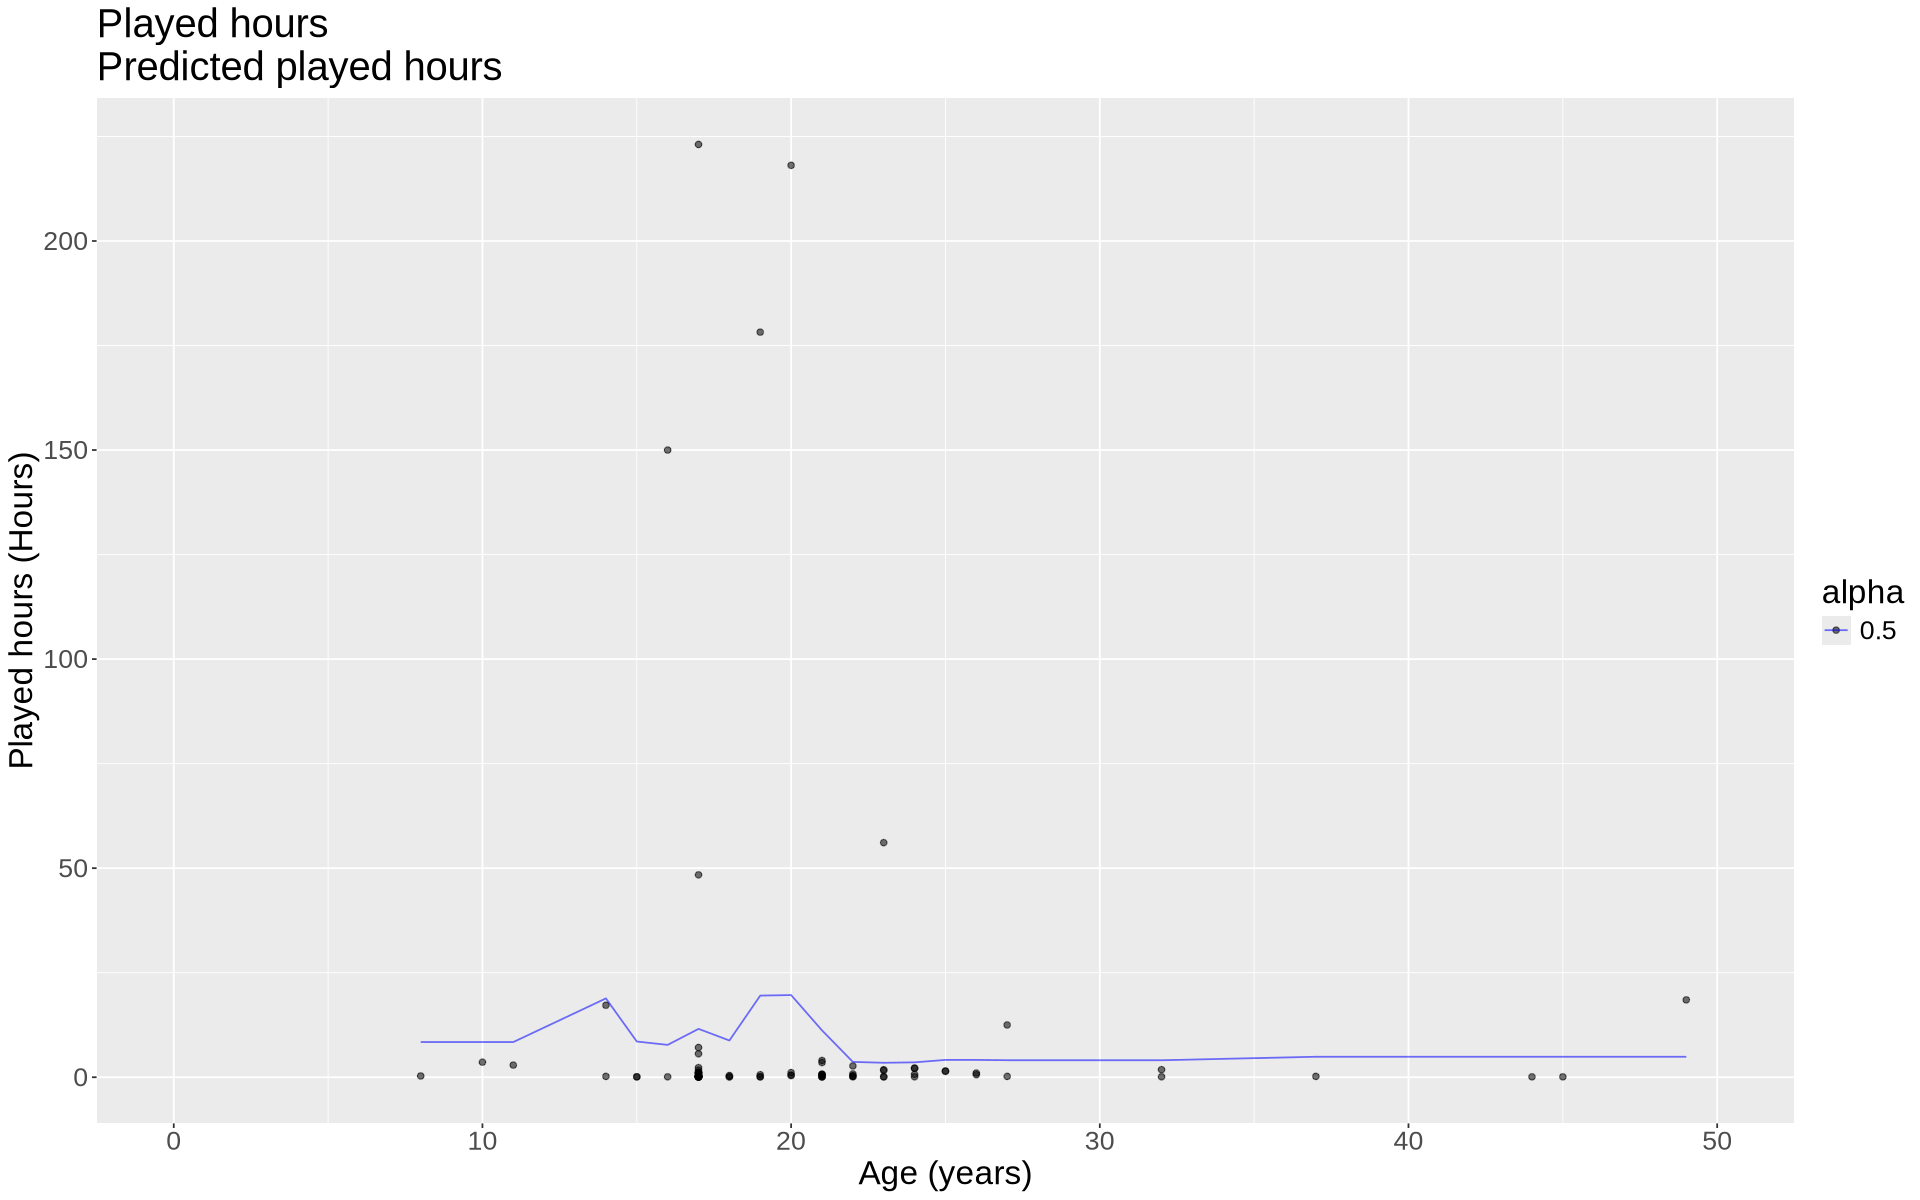

In [12]:

hours_age_predicted_data <- hours_age_best_fit |>
          predict(hours_age_training) |>
          bind_cols(hours_age_training)


hours_age_plot <- hours_age_predicted_data |> 
                    ggplot(aes(x = age, y = played_hours, alpha = 0.5)) +
                    # geom_bar(stat = "identity") +
                    geom_point()+
                    geom_line(data = hours_age_predicted_data,aes(x = age, y = .pred), color = "blue") +
                    xlim(c(0, 50))+
                    labs( x = "Age (years)", y = "Played hours (Hours)",
                         title = "Played hours\nPredicted played hours") +
                    theme(text = element_text(size = 20))

  
hours_age_plot

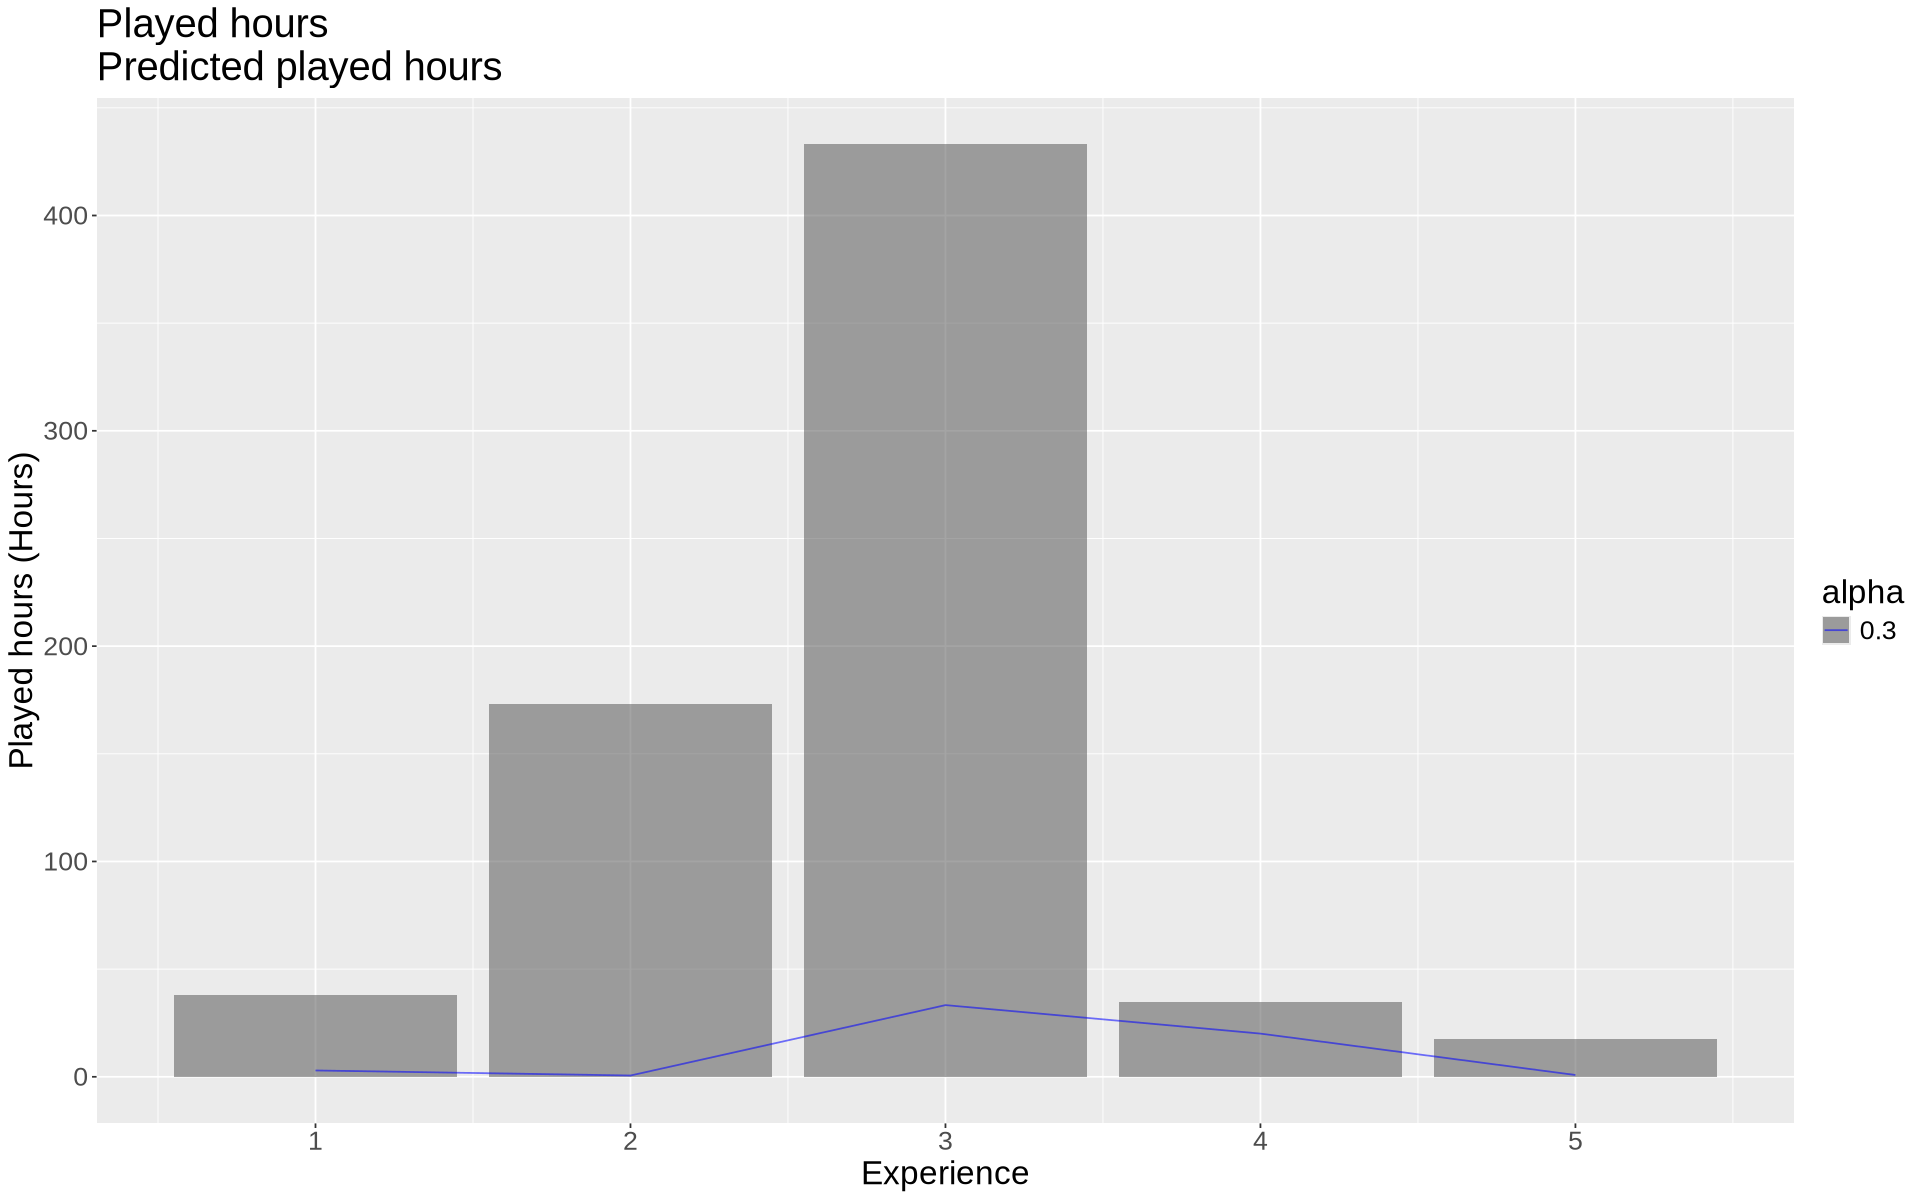

In [13]:
hours_experience_predicted_data <- hours_experience_best_fit |>
          predict(hours_experience_training) |>
          bind_cols(hours_experience_training)


hours_age_plot <- hours_experience_predicted_data |> 
                    ggplot(aes(x = experience_numeric, y = played_hours, alpha = 0.3)) +
                    geom_bar(stat = "identity") + 
                    labs( x = "Experience", y = "Played hours (Hours)",
                         title = "Played hours\nPredicted played hours", fill = "Experience")+
                    geom_line(data = hours_experience_predicted_data, aes(x = experience_numeric, y = .pred), color = "blue")+
                    theme(text = element_text(size = 20))

  
hours_age_plot

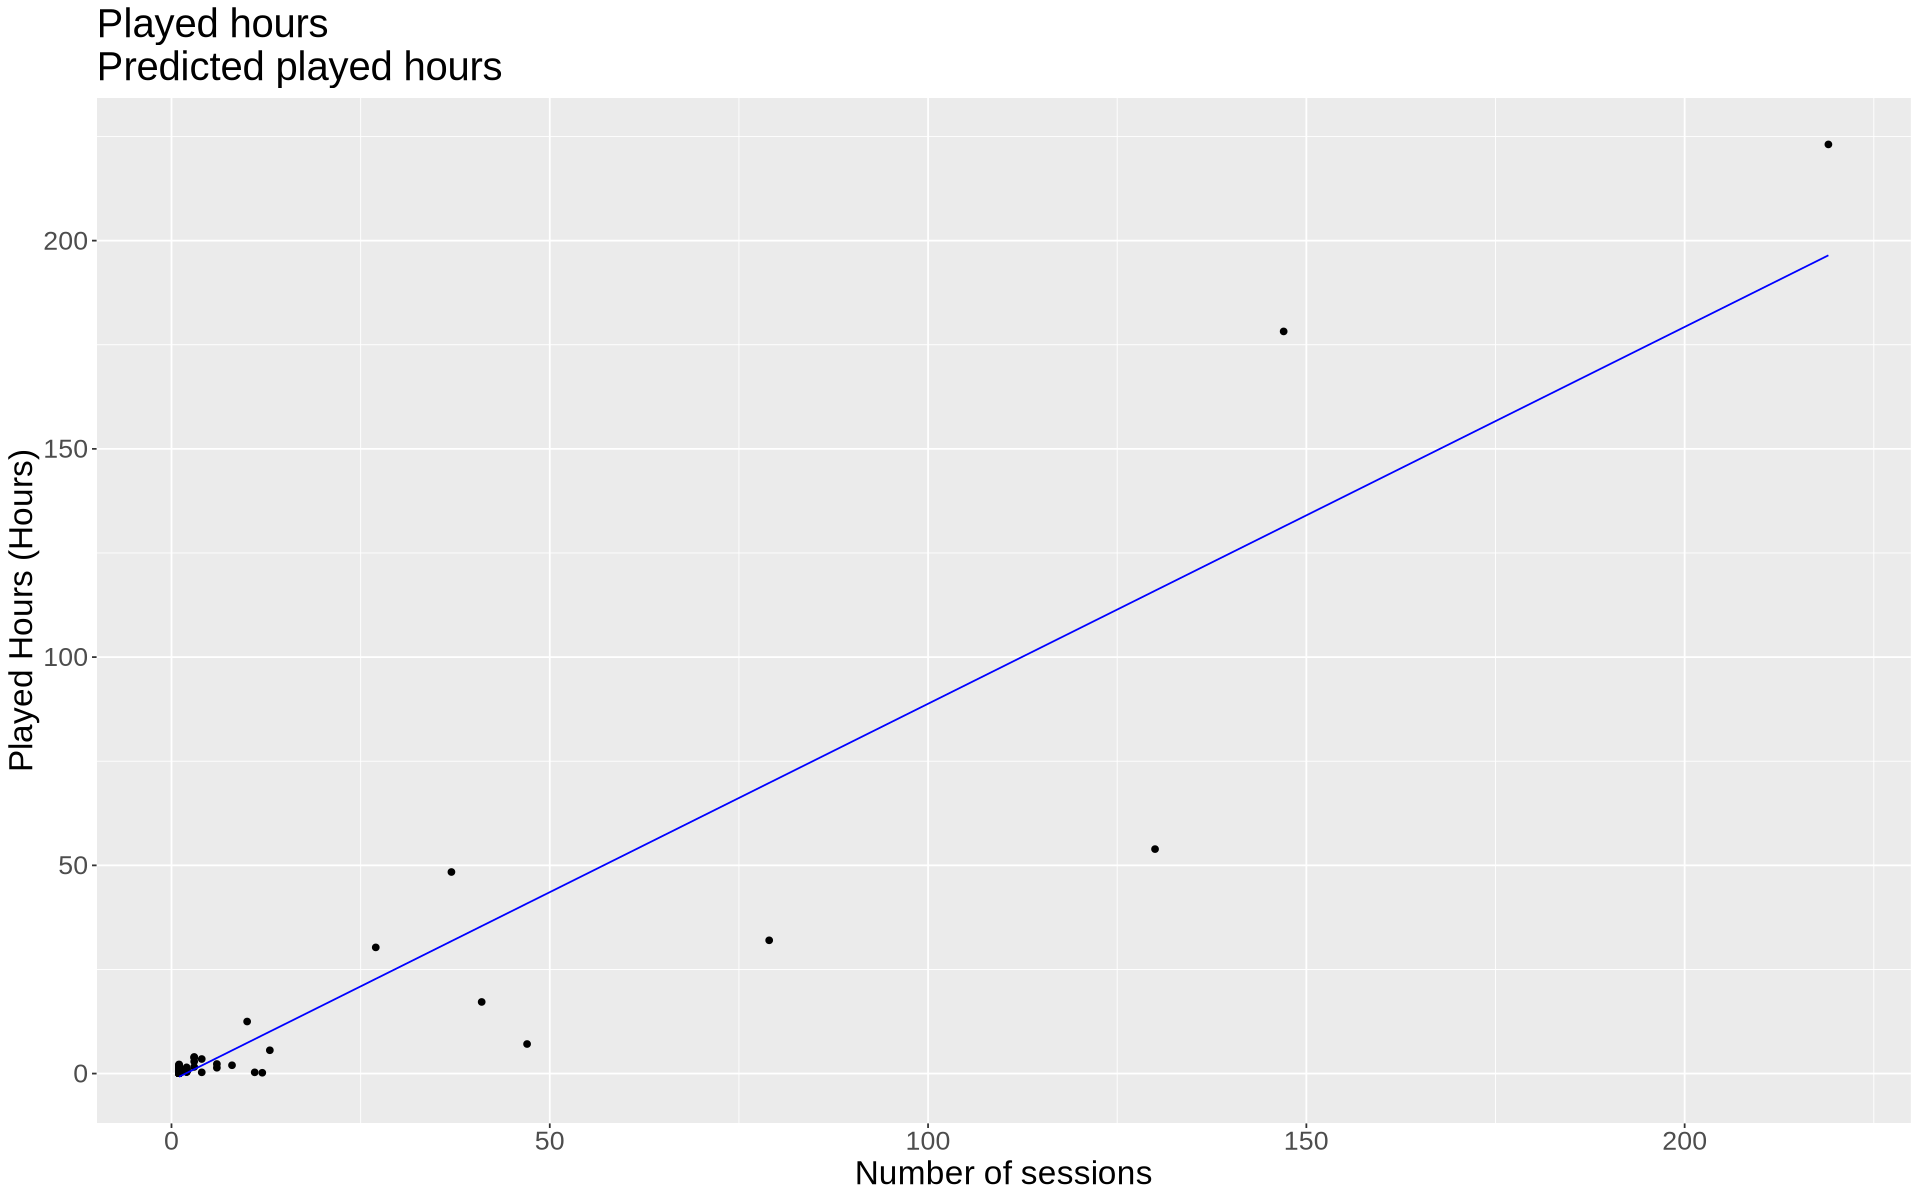

In [14]:
hours_sessions_predicted_data <- hours_sessions_best_fit |>
          predict(hours_sessions_training) |>
          bind_cols(hours_sessions_training)


hours_sessions_plot <- hours_sessions_predicted_data |> 
                    ggplot(aes(x = number_of_sessions, y = played_hours)) +
                    geom_point() +  
                    geom_line(data = hours_sessions_predicted_data, aes(x = number_of_sessions, y = .pred), color = "blue") +
                    labs( x = "Number of sessions", y = "Played Hours (Hours)", title= "Played hours\nPredicted played hours") +
                    theme(text = element_text(size = 20))
  
hours_sessions_plot